#Loading the dataset

In [3]:
# Step 1: Initial Data Loading and Basic Data Overview
import pandas as pd

# Load the dataset
apple_stock_data = pd.read_csv('HistoricalQuotes.csv')

# Display the first few rows to understand the structure
print(apple_stock_data.head())

# Display the data types and summary statistics
print(apple_stock_data.info())
print(apple_stock_data.describe())


         Date  Close/Last     Volume      Open      High       Low
0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB
None
             Volume
count  2.518000e+03
mean   7.258009e+07
std    5.663113e+07
min    1.136205e+07
25%    

In [5]:
# Print the column names to check their exact spelling and formatting
print(apple_stock_data.columns)


Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')


In [6]:
# Strip any leading or trailing spaces from column names
apple_stock_data.columns = apple_stock_data.columns.str.strip()

# Now you can proceed with converting the columns
print(apple_stock_data.columns)  # Verify the change


Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


# Exploratory Data Analysis

In [7]:
# Convert the 'Date' column to datetime format
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])

# Set the 'Date' column as the index
apple_stock_data.set_index('Date', inplace=True)

# Display the DataFrame to verify the changes
print(apple_stock_data.head())


           Close/Last     Volume      Open      High       Low
Date                                                          
2020-02-28    $273.36  106721200   $257.26   $278.41   $256.37
2020-02-27    $273.52   80151380    $281.1      $286   $272.96
2020-02-26    $292.65   49678430   $286.53   $297.88    $286.5
2020-02-25    $288.08   57668360   $300.95   $302.53   $286.13
2020-02-24    $298.18   55548830   $297.26   $304.18   $289.23


In [8]:
# Remove the dollar sign and convert columns to numeric
cols_to_convert = ['Close/Last', 'Open', 'High', 'Low']
for col in cols_to_convert:
    apple_stock_data[col] = apple_stock_data[col].replace('[\$,]', '', regex=True).astype(float)

# Display the DataFrame to verify the conversion
print(apple_stock_data.head())


            Close/Last     Volume    Open    High     Low
Date                                                     
2020-02-28      273.36  106721200  257.26  278.41  256.37
2020-02-27      273.52   80151380  281.10  286.00  272.96
2020-02-26      292.65   49678430  286.53  297.88  286.50
2020-02-25      288.08   57668360  300.95  302.53  286.13
2020-02-24      298.18   55548830  297.26  304.18  289.23


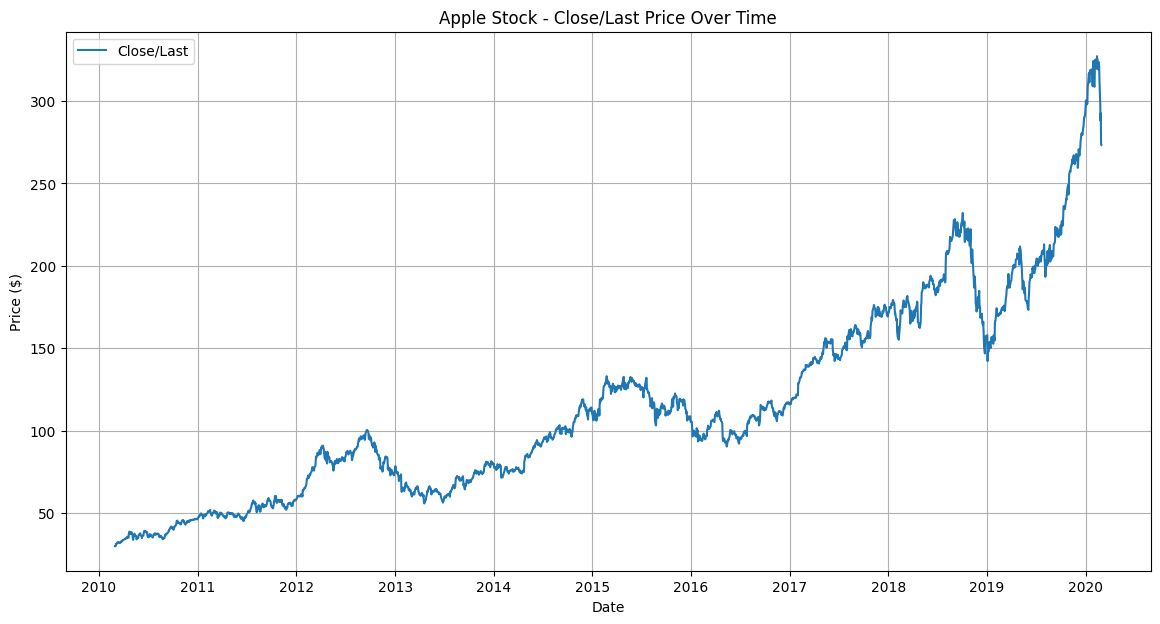

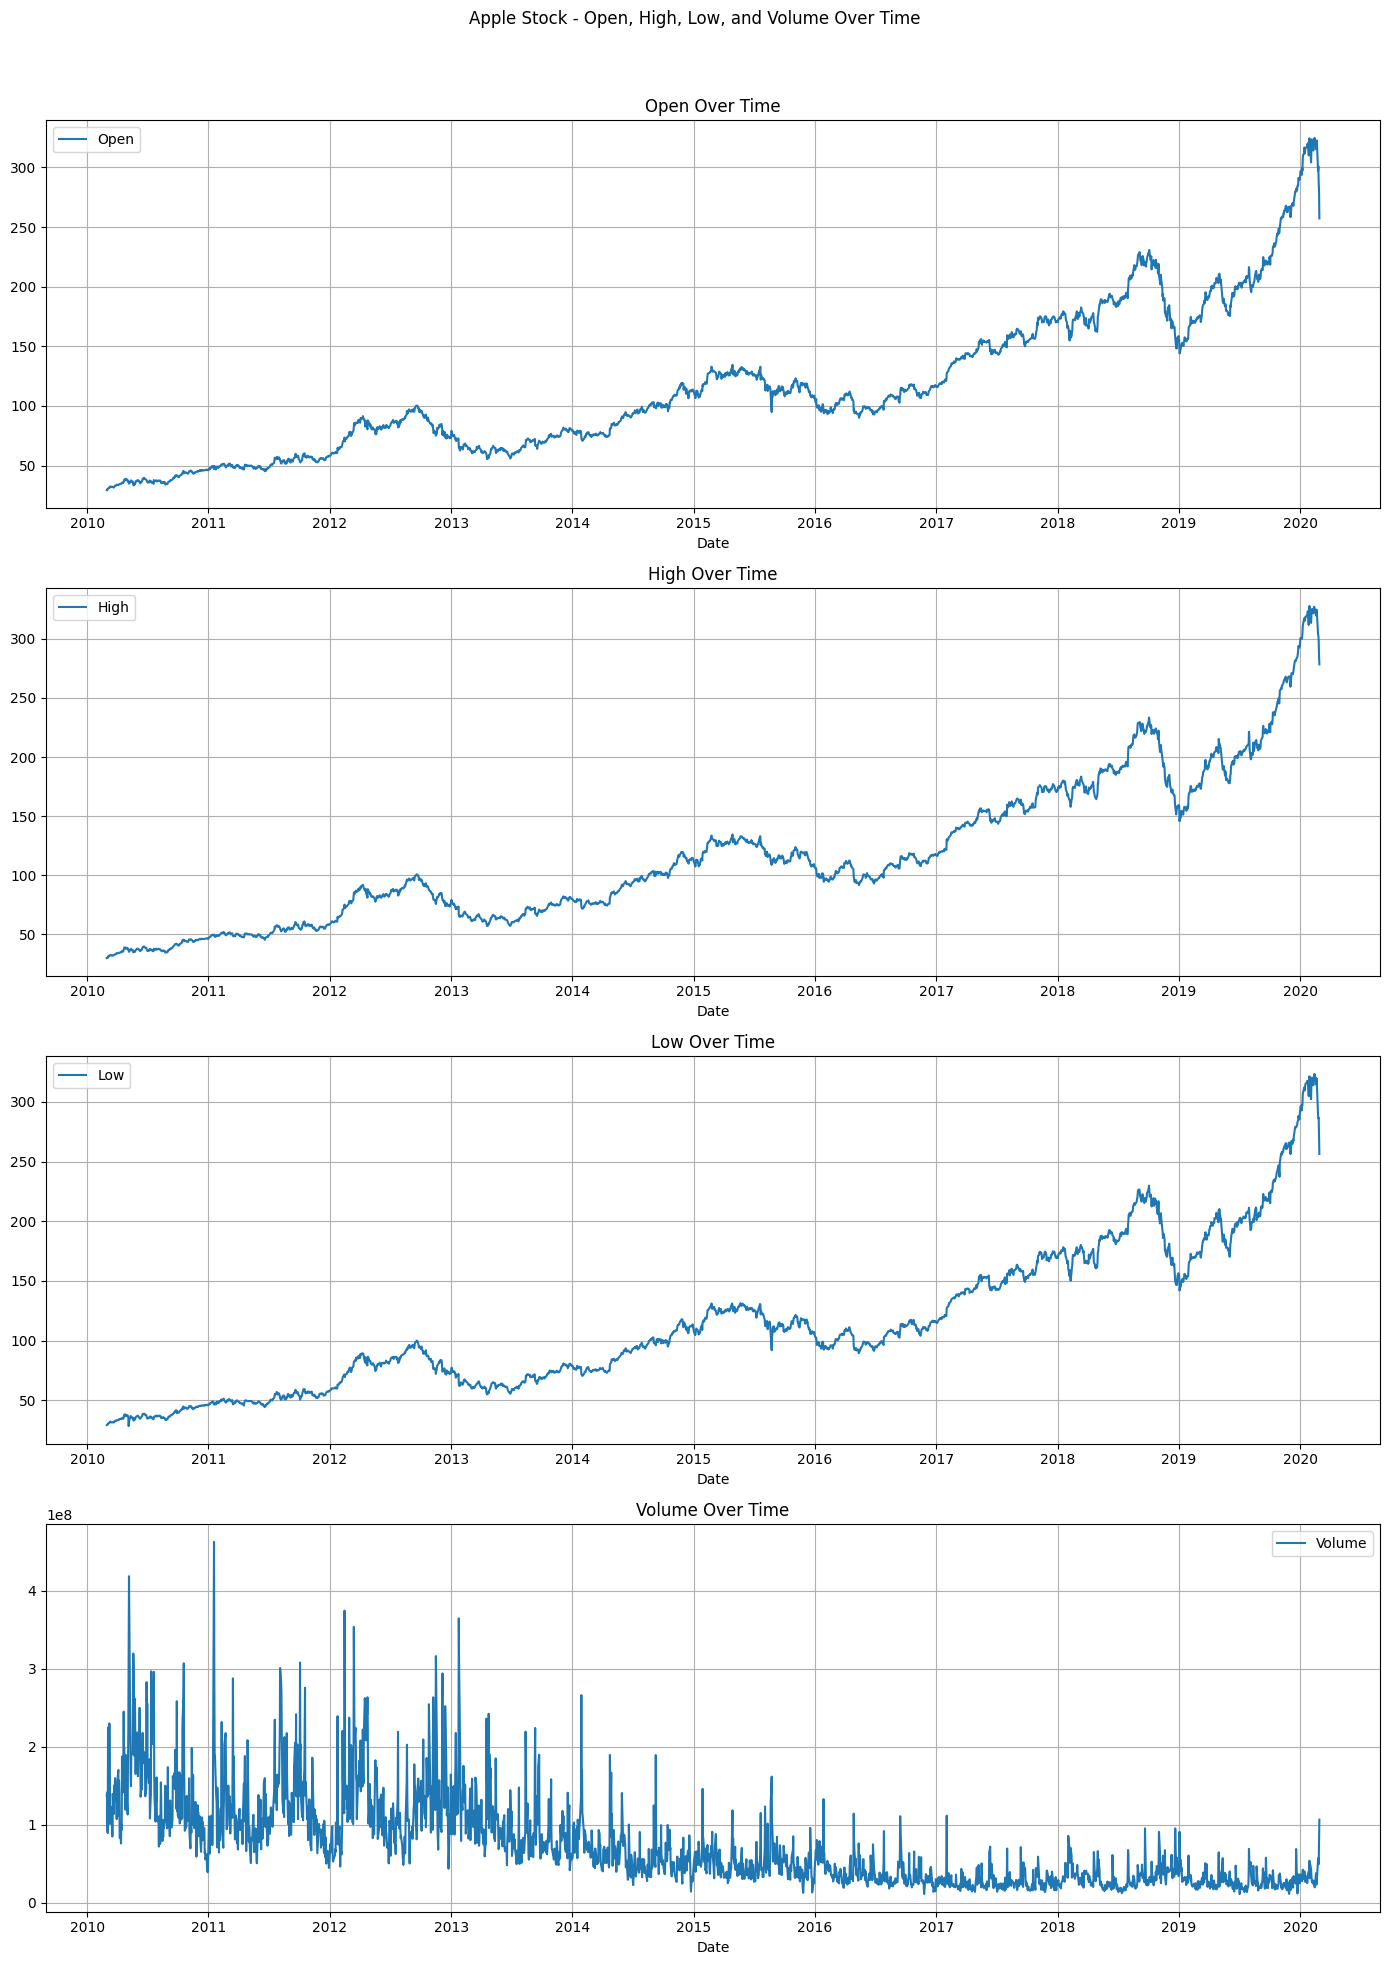

In [9]:
import matplotlib.pyplot as plt

# Line plot for 'Close/Last' prices
plt.figure(figsize=(14, 7))
plt.plot(apple_stock_data.index, apple_stock_data['Close/Last'], label='Close/Last')
plt.title('Apple Stock - Close/Last Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Subplots for 'Open', 'High', 'Low', and 'Volume'
fig, axs = plt.subplots(4, 1, figsize=(14, 20))
fig.suptitle('Apple Stock - Open, High, Low, and Volume Over Time')

columns = ['Open', 'High', 'Low', 'Volume']
for i, col in enumerate(columns):
    axs[i].plot(apple_stock_data.index, apple_stock_data[col], label=col, color='tab:blue')
    axs[i].set_title(f'{col} Over Time')
    axs[i].set_xlabel('Date')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


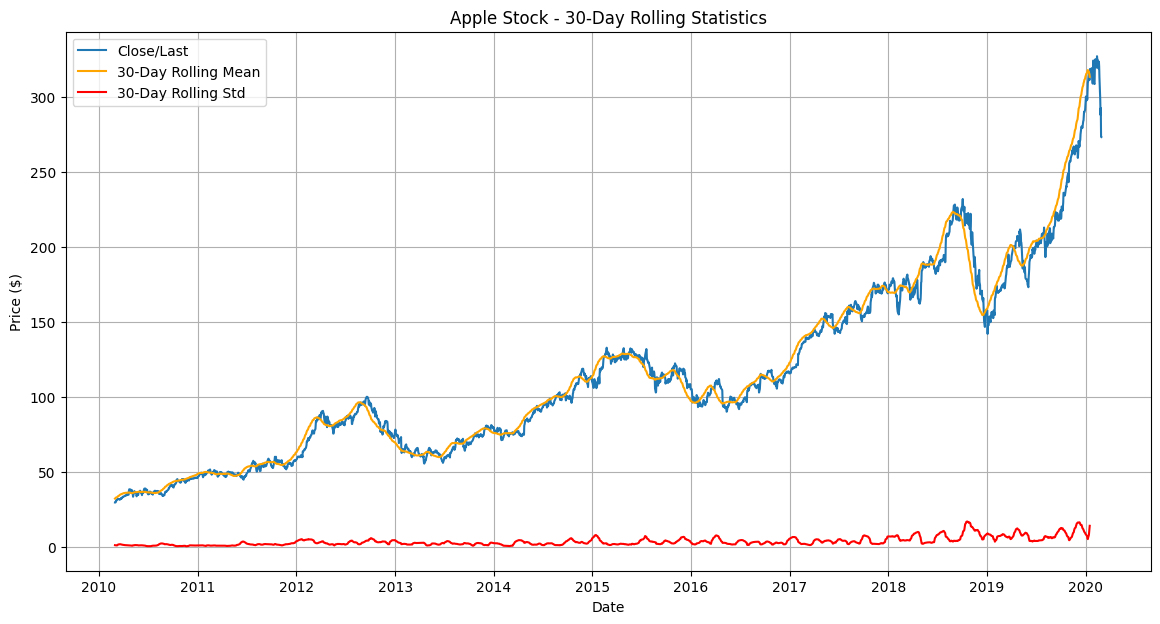

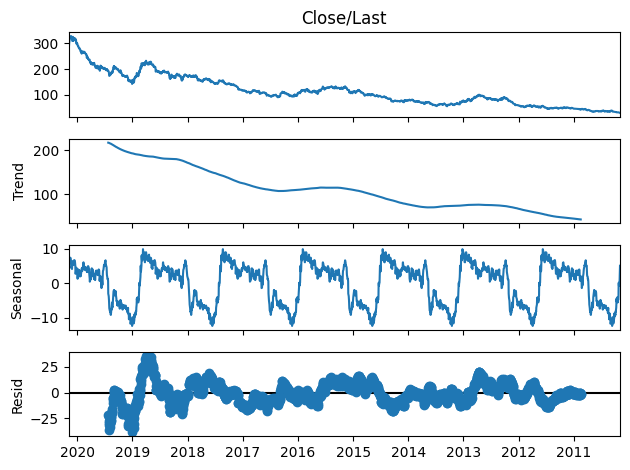

In [10]:
# Plotting rolling mean and standard deviation
apple_stock_data['Rolling_Mean'] = apple_stock_data['Close/Last'].rolling(window=30).mean()
apple_stock_data['Rolling_Std'] = apple_stock_data['Close/Last'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(apple_stock_data.index, apple_stock_data['Close/Last'], label='Close/Last')
plt.plot(apple_stock_data.index, apple_stock_data['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
plt.plot(apple_stock_data.index, apple_stock_data['Rolling_Std'], label='30-Day Rolling Std', color='red')
plt.title('Apple Stock - 30-Day Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(apple_stock_data['Close/Last'], model='additive', period=365)
decomposition.plot()
plt.show()


# Data Cleaning and Preprocessing

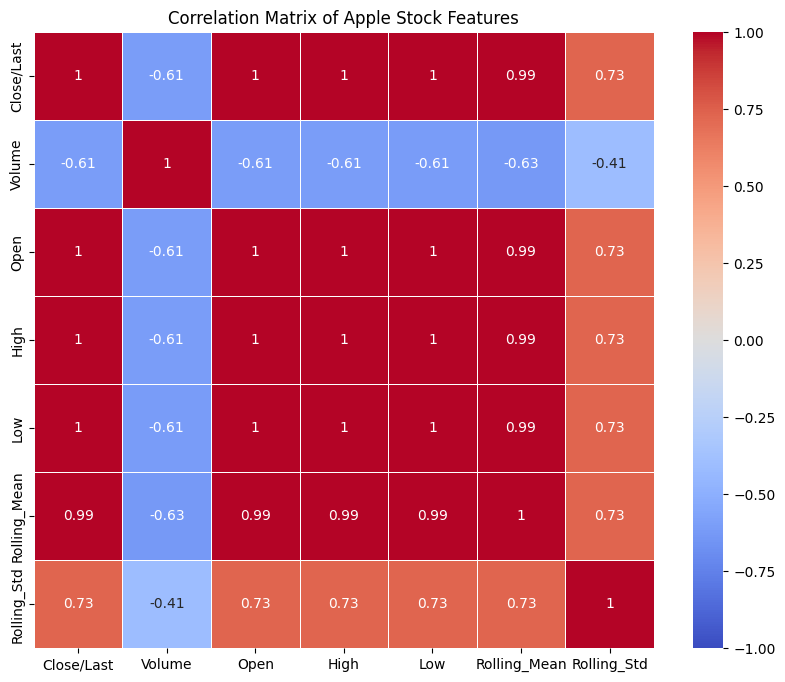

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = apple_stock_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Apple Stock Features')
plt.show()


<ipython-input-14-fa17916ffd44>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  apple_stock_data.fillna(method='ffill', inplace=True)
<ipython-input-14-fa17916ffd44>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  apple_stock_data.fillna(method='bfill', inplace=True)


Number of NaN values after filling: 0
Number of anomalies detected: 51


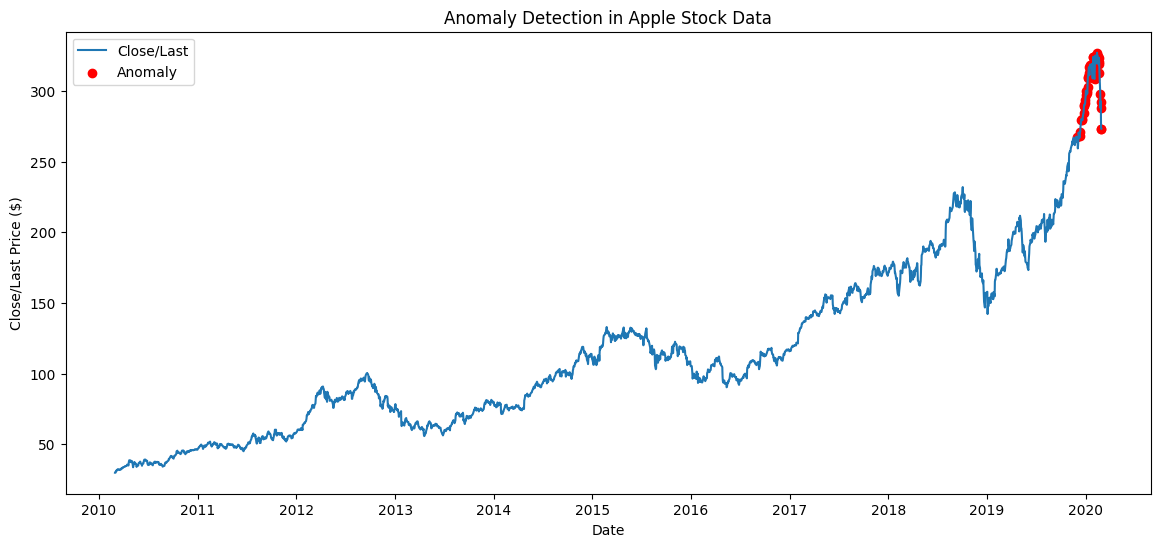

In [14]:
# Fill missing values using both forward fill and backward fill
apple_stock_data.fillna(method='ffill', inplace=True)
apple_stock_data.fillna(method='bfill', inplace=True)

# Check again for any remaining NaN values
print("Number of NaN values after filling:", apple_stock_data.isnull().sum().sum())

# Re-run the anomaly detection step
iso_forest = IsolationForest(contamination=0.02, random_state=42)
apple_stock_data['Anomaly'] = iso_forest.fit_predict(apple_stock_data)

# Count the number of anomalies detected
num_anomalies = (apple_stock_data['Anomaly'] == -1).sum()
print("Number of anomalies detected:", num_anomalies)

# Visualize the anomalies
plt.figure(figsize=(14, 6))
plt.plot(apple_stock_data.index, apple_stock_data['Close/Last'], label='Close/Last')
plt.scatter(apple_stock_data.index[apple_stock_data['Anomaly'] == -1],
            apple_stock_data['Close/Last'][apple_stock_data['Anomaly'] == -1],
            color='red', label='Anomaly')
plt.title('Anomaly Detection in Apple Stock Data')
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')
plt.legend()
plt.show()


In [15]:
# Remove the detected anomalies from the dataset
cleaned_apple_stock_data = apple_stock_data[apple_stock_data['Anomaly'] != -1]

# Drop the 'Anomaly' column as it is no longer needed
cleaned_apple_stock_data.drop(columns=['Anomaly'], inplace=True)

# Display the shape of the cleaned dataset
print("Shape of the dataset after removing anomalies:", cleaned_apple_stock_data.shape)

# Preview the cleaned dataset
print(cleaned_apple_stock_data.head())


Shape of the dataset after removing anomalies: (2467, 7)
            Close/Last    Volume    Open      High       Low  Rolling_Mean  \
Date                                                                         
2019-12-23      284.00  24677880  280.53  284.2500  280.3735    307.745000   
2019-12-19      280.02  24626950  279.50  281.1800  278.9500    305.050333   
2019-12-18      279.74  29024690  279.80  281.9000  279.1200    304.086333   
2019-12-13      275.15  33432810  271.46  275.3000  270.9300    300.009667   
2019-12-12      271.46  34437040  267.78  272.5599  267.3210    298.468667   

            Rolling_Std  
Date                     
2019-12-23    12.077409  
2019-12-19    13.481679  
2019-12-18    14.227970  
2019-12-13    15.000939  
2019-12-12    15.488667  


<ipython-input-15-ac08815988eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_apple_stock_data.drop(columns=['Anomaly'], inplace=True)


# Feature Engineering

In [16]:
# Create moving averages
cleaned_apple_stock_data['7-Day Moving Avg'] = cleaned_apple_stock_data['Close/Last'].rolling(window=7).mean()
cleaned_apple_stock_data['30-Day Moving Avg'] = cleaned_apple_stock_data['Close/Last'].rolling(window=30).mean()

# Create lagged features
cleaned_apple_stock_data['Lag_1'] = cleaned_apple_stock_data['Close/Last'].shift(1)
cleaned_apple_stock_data['Lag_7'] = cleaned_apple_stock_data['Close/Last'].shift(7)

# Add rolling standard deviation
cleaned_apple_stock_data['7-Day Rolling Std'] = cleaned_apple_stock_data['Close/Last'].rolling(window=7).std()
cleaned_apple_stock_data['30-Day Rolling Std'] = cleaned_apple_stock_data['Close/Last'].rolling(window=30).std()

# Display the updated DataFrame to verify new features
print("Preview of the DataFrame after feature engineering:")
print(cleaned_apple_stock_data.head(10))


Preview of the DataFrame after feature engineering:
            Close/Last    Volume    Open      High       Low  Rolling_Mean  \
Date                                                                         
2019-12-23      284.00  24677880  280.53  284.2500  280.3735    307.745000   
2019-12-19      280.02  24626950  279.50  281.1800  278.9500    305.050333   
2019-12-18      279.74  29024690  279.80  281.9000  279.1200    304.086333   
2019-12-13      275.15  33432810  271.46  275.3000  270.9300    300.009667   
2019-12-12      271.46  34437040  267.78  272.5599  267.3210    298.468667   
2019-12-09      266.92  32182650  270.00  270.8000  264.9100    293.791333   
2019-12-06      270.71  26547490  267.48  271.0000  267.3000    292.225000   
2019-12-05      265.58  18661340  263.79  265.8900  262.7300    290.525333   
2019-12-04      261.74  16810390  261.07  263.3100  260.6800    288.625667   
2019-12-03      259.45  29377270  258.31  259.5300  256.2900    286.766000   

           

<ipython-input-16-7641549fe648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_apple_stock_data['7-Day Moving Avg'] = cleaned_apple_stock_data['Close/Last'].rolling(window=7).mean()
<ipython-input-16-7641549fe648>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_apple_stock_data['30-Day Moving Avg'] = cleaned_apple_stock_data['Close/Last'].rolling(window=30).mean()
<ipython-input-16-7641549fe648>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Feature importances from RandomForestRegressor:
               Feature  Importance
3                  Low    0.523128
2                 High    0.315474
4         Rolling_Mean    0.073714
7    30-Day Moving Avg    0.044077
6     7-Day Moving Avg    0.022970
9                Lag_7    0.014984
1                 Open    0.004622
8                Lag_1    0.000866
11  30-Day Rolling Std    0.000107
10   7-Day Rolling Std    0.000025
0               Volume    0.000019
5          Rolling_Std    0.000015


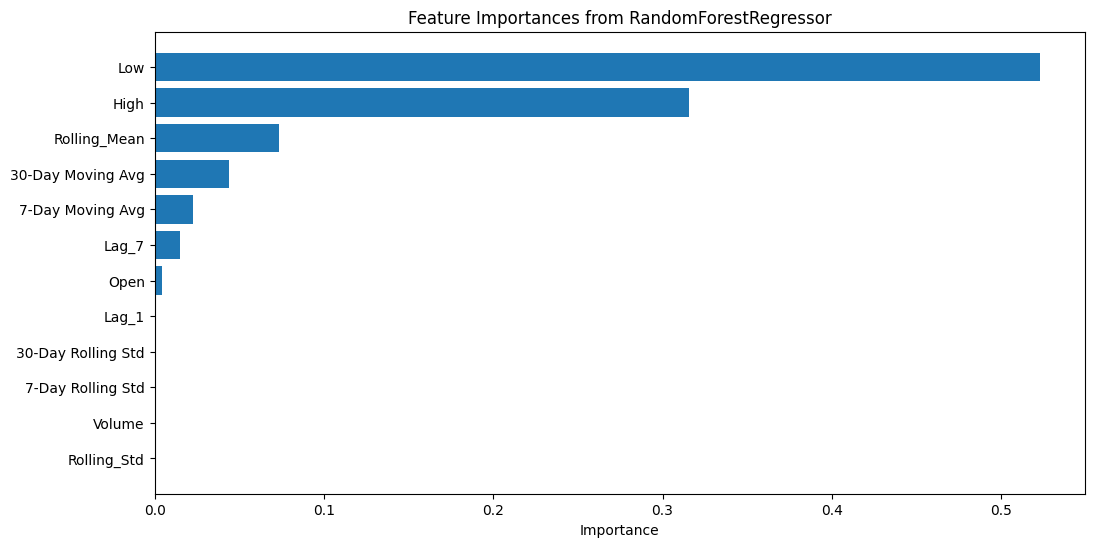

In [18]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Split the data into features and target
X = cleaned_apple_stock_data.drop(columns=['Close/Last'])
y = cleaned_apple_stock_data['Close/Last']

# Train a simple RandomForestRegressor model to evaluate feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature importances from RandomForestRegressor:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()


#Clustering and Anomaly Detection and Elimination.

In [20]:
# Impute any remaining missing values in X with forward and backward fill
X.fillna(method='ffill', inplace=True)
X.fillna(method='bfill', inplace=True)

# Check if there are any remaining NaN values
print("Number of NaN values after filling in X:", X.isnull().sum().sum())


Number of NaN values after filling in X: 0


<ipython-input-20-dd31cc2e6c18>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
<ipython-input-20-dd31cc2e6c18>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='bfill', inplace=True)


<ipython-input-21-14531e7cf42f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_apple_stock_data['Cluster'] = kmeans.fit_predict(X)


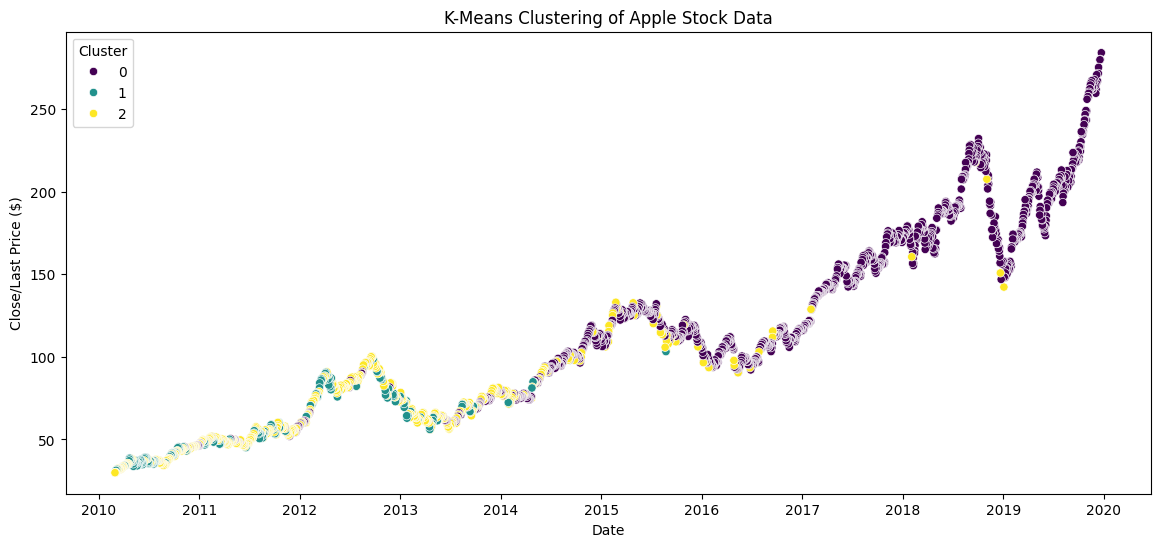

In [21]:
from sklearn.cluster import KMeans
import seaborn as sns

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_apple_stock_data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clustering results
plt.figure(figsize=(14, 6))
sns.scatterplot(
    x=cleaned_apple_stock_data.index,
    y=cleaned_apple_stock_data['Close/Last'],
    hue=cleaned_apple_stock_data['Cluster'],
    palette='viridis',
    legend='full'
)
plt.title('K-Means Clustering of Apple Stock Data')
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')
plt.show()


Cluster distribution:
 Cluster
0    1524
2     734
1     209
Name: count, dtype: int64

Clusters identified as potential anomalies: Index([], dtype='int32', name='Cluster')


<ipython-input-22-834fa2c9eb66>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_apple_stock_data['Anomaly'] = cleaned_apple_stock_data['Cluster'].apply(lambda x: 1 if x in anomaly_clusters else 0)


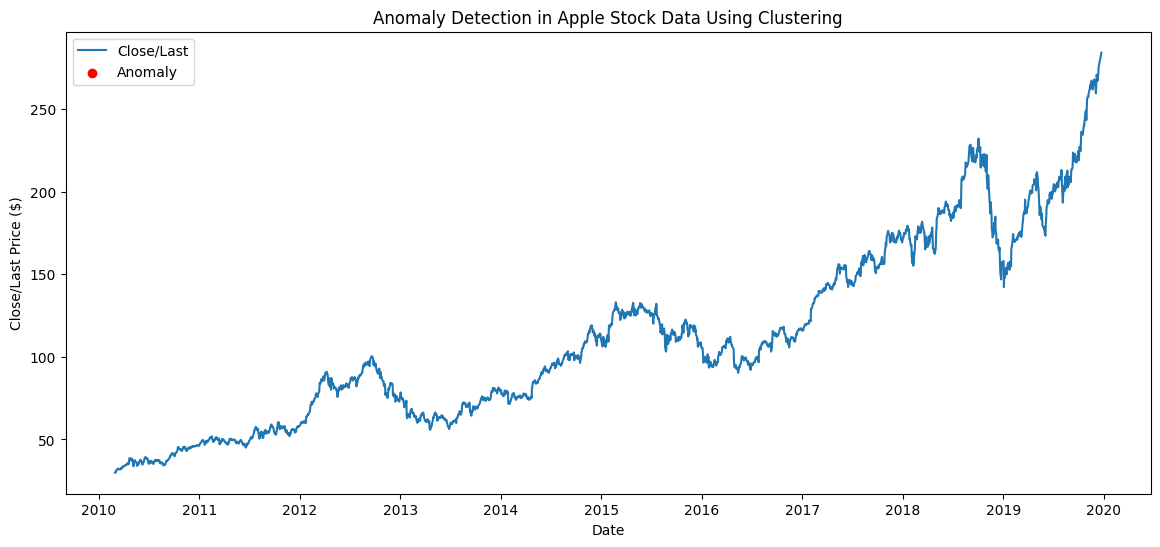


Number of anomalies detected: 0


In [22]:
# Visualize the distribution of data points within each cluster to identify potential anomalies
cluster_counts = cleaned_apple_stock_data['Cluster'].value_counts()
print("Cluster distribution:\n", cluster_counts)

# Set a threshold for identifying anomalies based on cluster size
anomaly_clusters = cluster_counts[cluster_counts < (0.05 * len(cleaned_apple_stock_data))].index
print("\nClusters identified as potential anomalies:", anomaly_clusters)

# Mark anomalies in the dataset based on these cluster labels
cleaned_apple_stock_data['Anomaly'] = cleaned_apple_stock_data['Cluster'].apply(lambda x: 1 if x in anomaly_clusters else 0)

# Visualize anomalies on the price chart
plt.figure(figsize=(14, 6))
plt.plot(cleaned_apple_stock_data.index, cleaned_apple_stock_data['Close/Last'], label='Close/Last')
plt.scatter(
    cleaned_apple_stock_data.index[cleaned_apple_stock_data['Anomaly'] == 1],
    cleaned_apple_stock_data['Close/Last'][cleaned_apple_stock_data['Anomaly'] == 1],
    color='red', label='Anomaly'
)
plt.title('Anomaly Detection in Apple Stock Data Using Clustering')
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')
plt.legend()
plt.show()

# Count the number of anomalies detected
num_anomalies = cleaned_apple_stock_data['Anomaly'].sum()
print("\nNumber of anomalies detected:", num_anomalies)


In [23]:
# Eliminate anomalies from the dataset by filtering out rows labeled as anomalies
cleaned_apple_stock_data_no_anomalies = cleaned_apple_stock_data[cleaned_apple_stock_data['Anomaly'] != 1]

# Drop the 'Cluster' and 'Anomaly' columns as they are no longer needed for modeling
cleaned_apple_stock_data_no_anomalies = cleaned_apple_stock_data_no_anomalies.drop(columns=['Cluster', 'Anomaly'])

# Display the shape and a preview of the cleaned data without anomalies
print("Shape of the dataset after removing anomalies:", cleaned_apple_stock_data_no_anomalies.shape)
print(cleaned_apple_stock_data_no_anomalies.head())


Shape of the dataset after removing anomalies: (2467, 13)
            Close/Last    Volume    Open      High       Low  Rolling_Mean  \
Date                                                                         
2019-12-23      284.00  24677880  280.53  284.2500  280.3735    307.745000   
2019-12-19      280.02  24626950  279.50  281.1800  278.9500    305.050333   
2019-12-18      279.74  29024690  279.80  281.9000  279.1200    304.086333   
2019-12-13      275.15  33432810  271.46  275.3000  270.9300    300.009667   
2019-12-12      271.46  34437040  267.78  272.5599  267.3210    298.468667   

            Rolling_Std  7-Day Moving Avg  30-Day Moving Avg   Lag_1  Lag_7  \
Date                                                                          
2019-12-23    12.077409               NaN                NaN     NaN    NaN   
2019-12-19    13.481679               NaN                NaN  284.00    NaN   
2019-12-18    14.227970               NaN                NaN  280.02    NaN   


#Model Building and AutoML Integration with H2O

In [27]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=baa11f220a50f9d6c8eb0cb96ecce196f861765818e9c85305da9b233f79f8d7
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [28]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjq8_w6gl
  JVM stdout: /tmp/tmpjq8_w6gl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjq8_w6gl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_x2xncr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [29]:
h2o_frame = h2o.H2OFrame(cleaned_apple_stock_data_no_anomalies)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
train, test = h2o_frame.split_frame(ratios=[0.8], seed=42)


In [31]:
target = 'Close/Last'
features = [col for col in h2o_frame.columns if col != target]


In [32]:
aml = H2OAutoML(max_models=20, seed=42)
aml.train(x=features, y=target, training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [33]:
leaderboard = aml.leaderboard
print(leaderboard)


model_id                                                    rmse       mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20241110_63904  0.985532  0.971273  0.606256  0.0080335                   0.971273
StackedEnsemble_AllModels_1_AutoML_1_20241110_63904     1.00824   1.01655   0.617353  0.00824674                  1.01655
DeepLearning_grid_2_AutoML_1_20241110_63904_model_1     1.01197   1.02409   0.734071  0.0126988                   1.02409
DRF_1_AutoML_1_20241110_63904                           1.0196    1.03957   0.642987  0.00796712                  1.03957
GBM_grid_1_AutoML_1_20241110_63904_model_1              1.08444   1.17601   0.654458  0.00825328                  1.17601
XGBoost_grid_1_AutoML_1_20241110_63904_model_3          1.08981   1.18768   0.711999  0.00875861                  1.18768
XGBoost_grid_1_AutoML_1_20241110_63904_model_2          1.16232   1.35099   0.755969  0.00932636                  1.35099
GBM_2_AutoML_1_2024111

In [35]:
# Load the best model from AutoML
best_model = aml.leader

# Make predictions on the test set
test_predictions = best_model.predict(test)

# Evaluate model performance
performance = best_model.model_performance(test)

# Print the metrics
print("Performance on Test Data:")
print(performance)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Performance on Test Data:
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.8598574547455857
RMSE: 0.9272849911141589
MAE: 0.6381696741528523
RMSLE: 0.007569026938263661
Mean Residual Deviance: 0.8598574547455857
R^2: 0.9996936602351464
Null degrees of freedom: 489
Residual degrees of freedom: 483
Null deviance: 1378121.7306604187
Residual deviance: 421.330152825337
AIC: 1332.575322194008
